# **Transform image into square format**

1.   Padding
2.   Cropping
3.   Warping



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.image import pad_to_bounding_box
from tensorflow.image import central_crop
from tensorflow.image import resize

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


(603, 1200, 3)


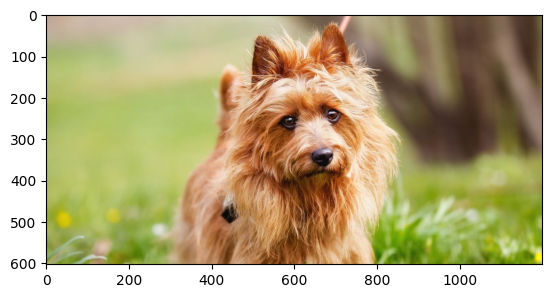

In [4]:
# Load image
dog_image = image.load_img('/content/drive/MyDrive/Samples/dog.jpeg')
dog_vector = np.asarray(image.img_to_array(dog_image))
dog_vector = dog_vector / 255
print(dog_vector.shape)
plt.imshow(dog_vector)

In [7]:
# Extract source size
source_height = dog_vector.shape[0]
source_width = dog_vector.shape[1]
print('Height:', source_height)
print('Width:', source_width)

Height: 603
Width: 1200


### **1. Padding**

In [8]:
# Set target size
target_height = 1200
target_width = 1200

(1200, 1200, 3)


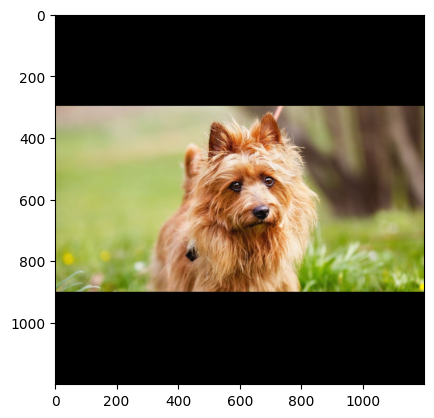

In [9]:
# Padding
dog_vector_pad = pad_to_bounding_box(dog_vector, int((target_height-source_height)/2), int((target_width-source_width)/2), target_height, target_width)
print(dog_vector_pad.shape)
plt.imshow(dog_vector_pad)

### **2. Cropping**

(303, 600, 3)


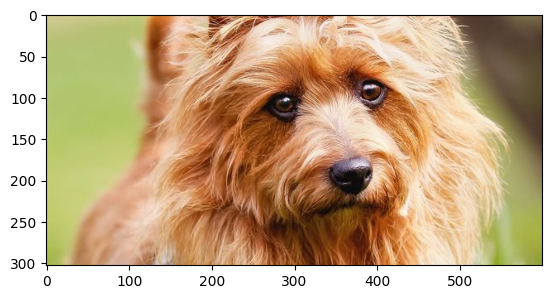

In [10]:
# Center cropping
dog_vector_crop = central_crop(dog_vector, .5)  # 50% of original size
print(dog_vector_crop.shape)
plt.imshow(dog_vector_crop)

(603, 603, 3)


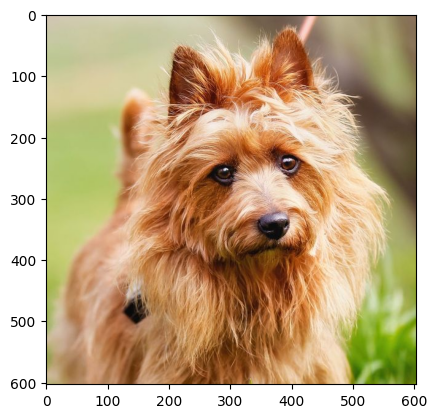

In [13]:
# Sqaure cropping
s = min(source_height, source_width)
y = (source_height - s) // 2
x = (source_width - s) // 2
dog_image_crop = dog_image.crop((x, y, x+s, y+s))
dog_vector_crop = np.array(dog_image_crop)
print(dog_vector_crop.shape)
plt.imshow(dog_vector_crop)

### **3. Warping**

(300, 300, 3)


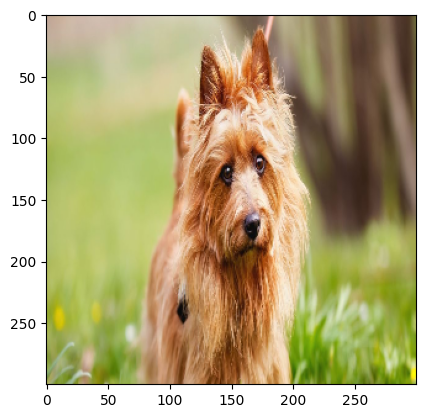

In [12]:
dog_vector_resize = resize(dog_vector, (300, 300))
print(dog_vector_resize.shape)
plt.imshow(dog_vector_resize)